In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




In [2]:
# Step 2: Load the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()




,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Step 3: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]




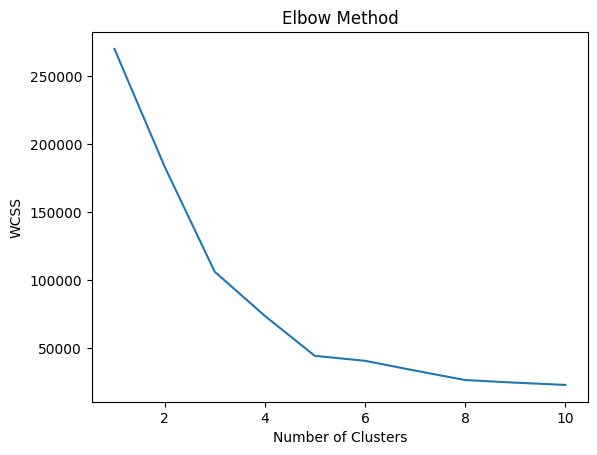

In [4]:
#Ste4: Find optimal number of clusters (Elbow Method)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [5]:
#Step6: Applly k-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)




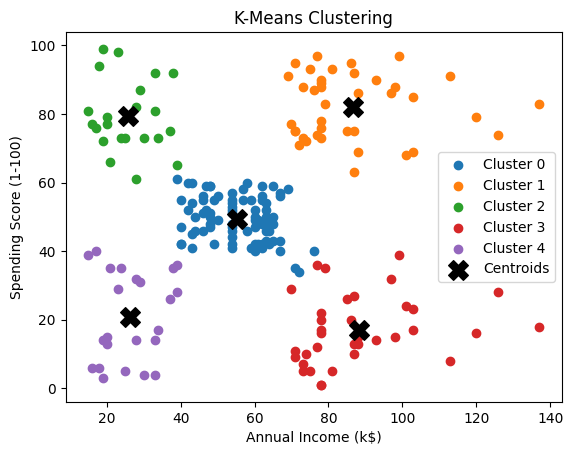

In [6]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot clusters
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0],
                X[y_kmeans == i, 1],
                label=f'Cluster {i}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200,
            c='black',
            marker='X',
            label='Centroids')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


In [7]:
# Step 8: Output cluster labels
df['Cluster'] = y_kmeans
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  



Cluster Centroids:
   Annual Income  Spending Score
0   74000.000000       81.200000
1   53444.444444       31.000000
2   60333.333333       68.166667


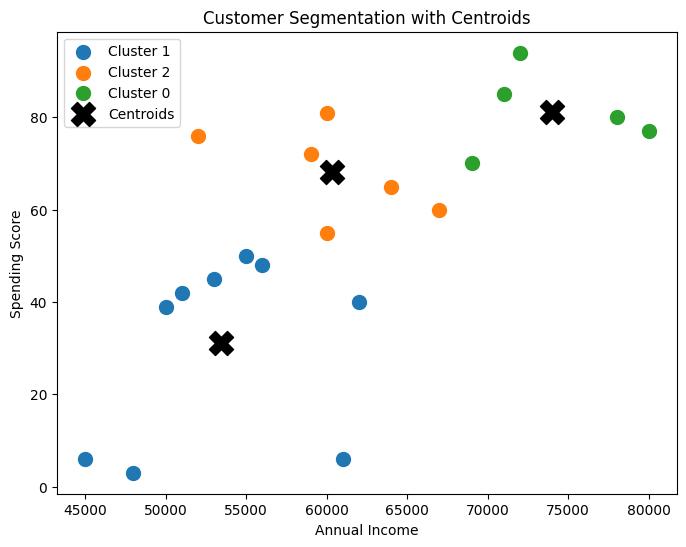

In [8]:
# Another implementation of the k-maens classifier
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Dataset
# -------------------------------
data = {
    'Annual Income': [50000, 60000, 45000, 80000, 62000, 52000, 61000, 72000, 48000, 59000,
                      53000, 64000, 55000, 71000, 67000, 56000, 51000, 78000, 60000, 69000],
    'Spending Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 45, 65, 50, 85, 60, 48, 42, 80, 55, 70]
}

df = pd.DataFrame(data)

# -------------------------------
# Scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# -------------------------------
# K-Means Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# -------------------------------
# Centroids (your code)
# -------------------------------
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

centroid_df = pd.DataFrame(
    centroids,
    columns=['Annual Income', 'Spending Score']
)

print("\nCluster Centroids:")
print(centroid_df)

# -------------------------------
# Visualization with Centroids
# -------------------------------
plt.figure(figsize=(8,6))

# Plot clusters
for cluster in df['Cluster'].unique():
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income'],
                df[df['Cluster'] == cluster]['Spending Score'],
                label=f'Cluster {cluster}',
                s=100)

# Plot centroids
plt.scatter(centroid_df['Annual Income'],
            centroid_df['Spending Score'],
            s=300,
            c='black',
            marker='X',
            label='Centroids')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation with Centroids')
plt.legend()
plt.show()
